#Car Image Testing

http://cogcomp.cs.illinois.edu/Data/Car/ 

In [11]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from skimage import io
import os
import glob

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [4]:
car1 = io.imread('C:\\datasets\\CarData\\TrainImages\\neg-0.pgm')
print car1.shape

(40L, 100L)


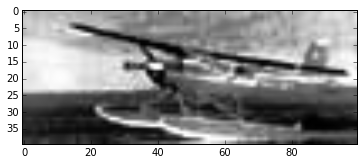

In [5]:
plt.imshow(car1, cmap=plt.cm.binary)

In [6]:
carflat = car1.flatten()
print carflat.shape

(4000L,)


In [44]:
path = 'C:\\datasets\\CarData\\TrainImages\\*.pgm'
Y = []
X = []

for fn in glob.glob(path):
    Y.append(os.path.basename(fn).startswith('pos'))
    X.append(io.imread(fn).flatten())

print len(Y)
print len(X)
print X[0].shape
    

1050
1050
(4000L,)


In [45]:
X = np.array(X)
Y = np.array(Y)

print train_data.shape
print train_labels.shape

(1050L, 4000L)
(1050L,)


In [46]:
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

In [47]:
train_data, train_labels = X[:800], Y[0:800]
test_data, test_labels = X[800:], Y[800:]

In [61]:
print len([x for x in train_labels if x]) / float(len(train_labels))
print len([x for x in test_labels if x]) / float(len(test_labels))

0.5225
0.528


In [48]:
lr = LogisticRegression()
lr.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [49]:
print lr.coef_

[[ -6.70508752e-04  -6.84269729e-04  -1.26678340e-04 ...,   7.28749487e-05
    2.61644059e-04   9.52941220e-04]]


In [36]:
def Get_Accuracy(predictions, labels):
    return np.count_nonzero(predictions == labels) / float(len(labels))

In [50]:
predictions = lr.predict(test_data)
print " Logistic Regression Accuracy = {}".format(Get_Accuracy(predictions, test_labels))

 Logistic Regression Accuracy = 0.944
